<a href="https://colab.research.google.com/github/esraa-abdelmaksoud/Shai-Training-Notebooks/blob/main/Credit_Card_Clustering_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

**CUST_ID :** Identification of Credit Card holder (Categorical)

**BALANCE :** Balance amount left in their account to make purchases

**BALANCE_FREQUENCY :** How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)

**PURCHASES :** Amount of purchases made from account

**ONEOFF_PURCHASES :** Maximum purchase amount done in one-go. (When a customer makes a single purchase of a product or service via a one-time payment)

**INSTALLMENTS_PURCHASES :** Amount of purchase done in installment

**CASH_ADVANCE :** Cash in advance given by the user. (When you take out a cash advance, you're borrowing money against your card's.)

**PURCHASES_FREQUENCY :** How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

**ONEOFFPURCHASESFREQUENCY :** How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)

**PURCHASESINSTALLMENTSFREQUENCY :** How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)

**CASHADVANCEFREQUENCY :** How frequently the cash in advance being paid

**CASHADVANCETRX :** Number of Transactions made with "Cash in Advanced"

**PURCHASES_TRX :** Number of purchase transactions made

**CREDIT_LIMIT :** Limit of Credit Card for user

**PAYMENTS :** Amount of Payment done by user

**MINIMUM_PAYMENTS :** Minimum amount of payments made by user

**PRCFULLPAYMENT :** Percent of full payment paid by user

**TENURE :** Tenure of credit card service for user. (Repayment Period)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture 
import seaborn as sns
import numpy as np
from tqdm import tqdm_notebook as tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

## Data Exploration

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/CC GENERAL.csv")

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Some values are missing in MINIMUM_PAYMENTS.

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [ ]:
# Visualize data frame correlation
corr = df.corr('kendall')
fig = px.imshow(corr, text_auto=True, aspect="auto")
fig.show()

### EDA

In [ ]:
# Relationship between BALANCE and MINIMUM_PAYMENTS
fig = px.scatter(df, x="BALANCE", y="MINIMUM_PAYMENTS")
fig.show()

In [ ]:
# Relationship between ONEOFF_PURCHASES and PURCHASES
fig = px.scatter(df, x="ONEOFF_PURCHASES", y="INSTALLMENTS_PURCHASES",
                 color="PURCHASES")
fig.show()

In [ ]:
# Relationship between CASH_ADVANCE_TRX and CASH_ADVANCE_FREQUENCY
fig = px.scatter(df, x="CASH_ADVANCE_TRX", y="CASH_ADVANCE_FREQUENCY",
                 color="CASH_ADVANCE")
fig.show()

In [ ]:
fig = px.box(df, y="CREDIT_LIMIT", points="all")
fig.show()

In [ ]:
df[df["PURCHASES"]>=2771.9].count()

CUST_ID                             783
BALANCE                             783
BALANCE_FREQUENCY                   783
PURCHASES                           783
ONEOFF_PURCHASES                    783
INSTALLMENTS_PURCHASES              783
CASH_ADVANCE                        783
PURCHASES_FREQUENCY                 783
ONEOFF_PURCHASES_FREQUENCY          783
PURCHASES_INSTALLMENTS_FREQUENCY    783
CASH_ADVANCE_FREQUENCY              783
CASH_ADVANCE_TRX                    783
PURCHASES_TRX                       783
CREDIT_LIMIT                        783
PAYMENTS                            783
MINIMUM_PAYMENTS                    777
PRC_FULL_PAYMENT                    783
TENURE                              783
dtype: int64

In [ ]:
fig = px.box(df, y="PURCHASES", points="all")
fig.show()

In [ ]:
fig = px.box(df[df["PRC_FULL_PAYMENT"]!=0], y="PRC_FULL_PAYMENT", points="all")
fig.show()

<AxesSubplot:>

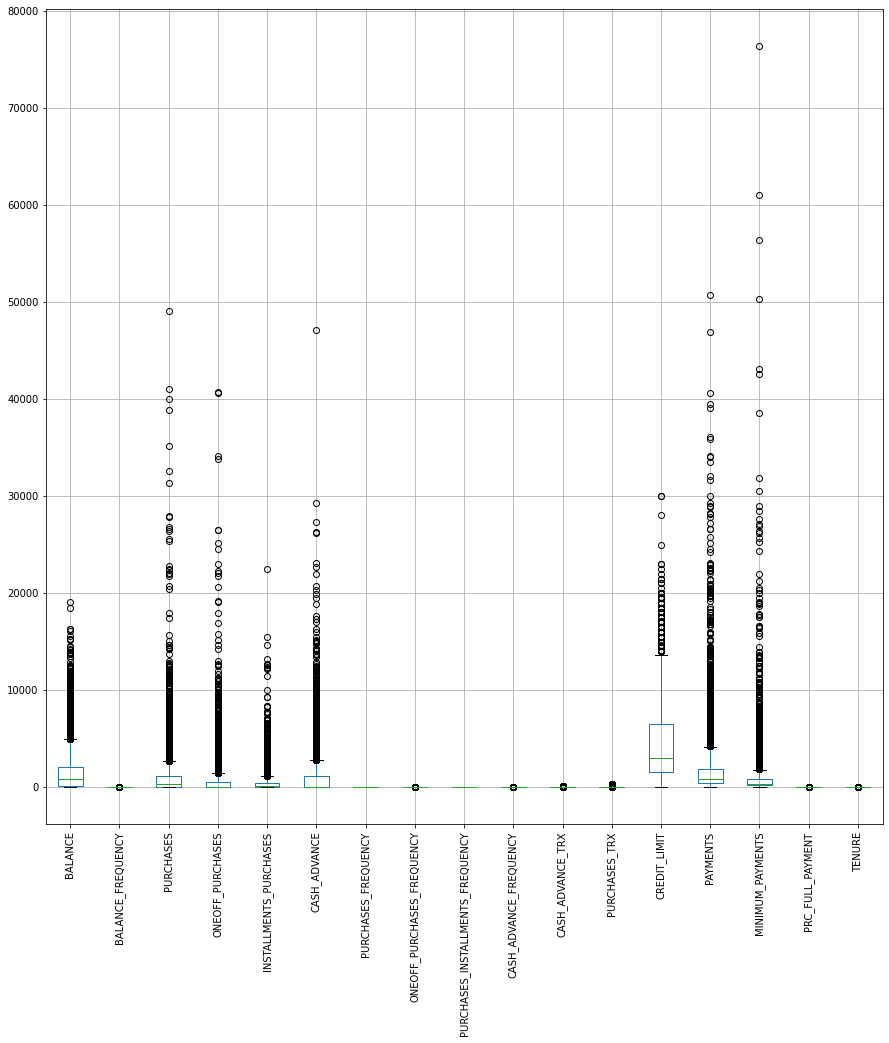

In [ ]:
plt.figure(figsize=(15,15))
df.boxplot(rot = 90)

## The data needs to be normalized , there is a lot of outliers

<AxesSubplot:xlabel='PURCHASES'>

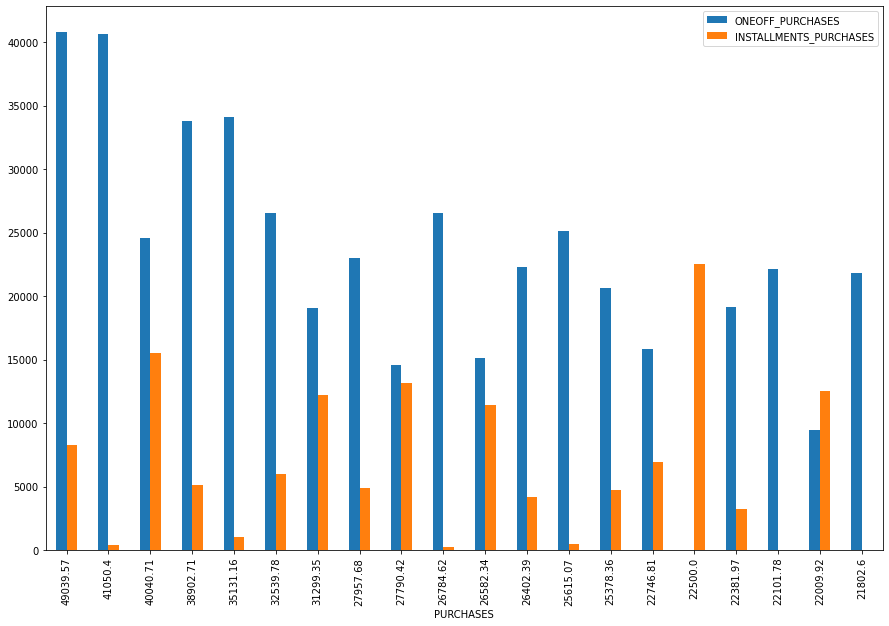

In [ ]:
# Do rich people always do the expensive oneoff purchases --> Moslty yes !
(df.groupby('PURCHASES')[['ONEOFF_PURCHASES' , 'INSTALLMENTS_PURCHASES']]
                             .sum()
                             .sort_index(ascending = False)
                             .head(20)
                             .plot(kind = 'bar',
                                   figsize=(15,10)))

<BarContainer object of 3 artists>

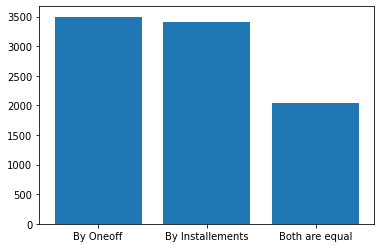

In [ ]:
#  Do people who buys with installements or cash do more purchases | spend more?

tup = (
    df.query('ONEOFF_PURCHASES > INSTALLMENTS_PURCHASES	').shape[0],
    df.query('ONEOFF_PURCHASES < INSTALLMENTS_PURCHASES').shape[0],
    df.query('ONEOFF_PURCHASES == INSTALLMENTS_PURCHASES').shape[0]
)
plt.bar(['By Oneoff' , 'By Installements' , 'Both are equal'] , tup)

<AxesSubplot:xlabel='CREDIT_LIMIT'>

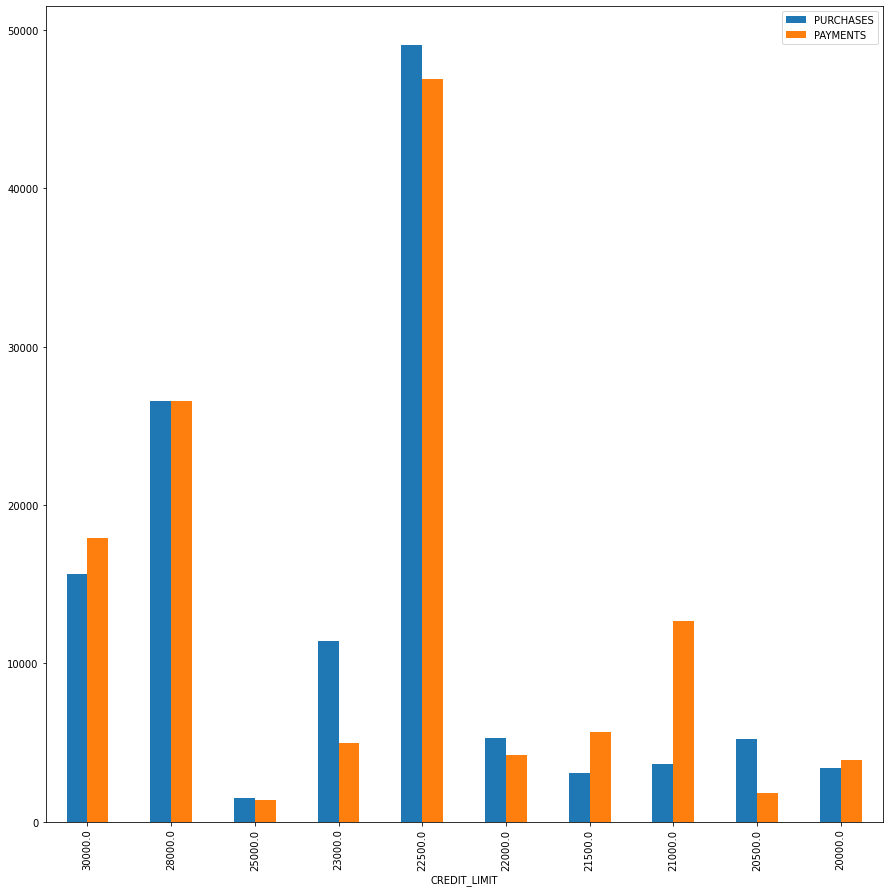

In [ ]:
# what is the highest credits limits ?

df.groupby('CREDIT_LIMIT')[['PURCHASES', 'PAYMENTS']].mean().sort_index(ascending = False).head(10).plot.bar(figsize=(15,15))

In [ ]:
# Correlation between purchases and sum of one-off purchases and installment purchases
sub = df[df['PURCHASES'].round()  != df['INSTALLMENTS_PURCHASES'].round()
                                      + df['ONEOFF_PURCHASES'].round() ]
sub['new_col'] = df['INSTALLMENTS_PURCHASES']  + df['ONEOFF_PURCHASES']
fig = px.imshow(sub[['new_col', 'PURCHASES']].corr() , text_auto=True, aspect="auto")
fig.show()

## Data Cleaning

In [ ]:
(df.isnull().sum()
 /
 df.count().max()*100).round(3)

CUST_ID                             0.000
BALANCE                             0.000
BALANCE_FREQUENCY                   0.000
PURCHASES                           0.000
ONEOFF_PURCHASES                    0.000
INSTALLMENTS_PURCHASES              0.000
CASH_ADVANCE                        0.000
PURCHASES_FREQUENCY                 0.000
ONEOFF_PURCHASES_FREQUENCY          0.000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000
CASH_ADVANCE_FREQUENCY              0.000
CASH_ADVANCE_TRX                    0.000
PURCHASES_TRX                       0.000
CREDIT_LIMIT                        0.011
PAYMENTS                            0.000
MINIMUM_PAYMENTS                    3.497
PRC_FULL_PAYMENT                    0.000
TENURE                              0.000
dtype: float64

In [ ]:
df = df[df['CREDIT_LIMIT'].notnull()]

In [ ]:
df.drop('CUST_ID' , axis = 1 ,inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8949 non-null   float64
 1   BALANCE_FREQUENCY                 8949 non-null   float64
 2   PURCHASES                         8949 non-null   float64
 3   ONEOFF_PURCHASES                  8949 non-null   float64
 4   INSTALLMENTS_PURCHASES            8949 non-null   float64
 5   CASH_ADVANCE                      8949 non-null   float64
 6   PURCHASES_FREQUENCY               8949 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 10  CASH_ADVANCE_TRX                  8949 non-null   int64  
 11  PURCHASES_TRX                     8949 non-null   int64  
 12  CREDIT

In [ ]:
# Getting rows with missing data MINIMUM_PAYMENTS
df[df['MINIMUM_PAYMENTS'].isna()]

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [ ]:
imputer = KNNImputer(n_neighbors= 20)
filled = imputer.fit_transform(df)
df_filled = pd.DataFrame(filled , columns= df.columns)

### Scaling

In [ ]:
scaler = MinMaxScaler() 
scaled = scaler.fit_transform(df_filled)
df_scaled = pd.DataFrame(scaled , columns = df.columns)
df_scaled.head(1)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.0,0.00424,0.0,0.166667,0.0,0.083333,0.0,0.0,0.005587,0.03172,0.003979,0.001826,0.0,1.0


<AxesSubplot:>

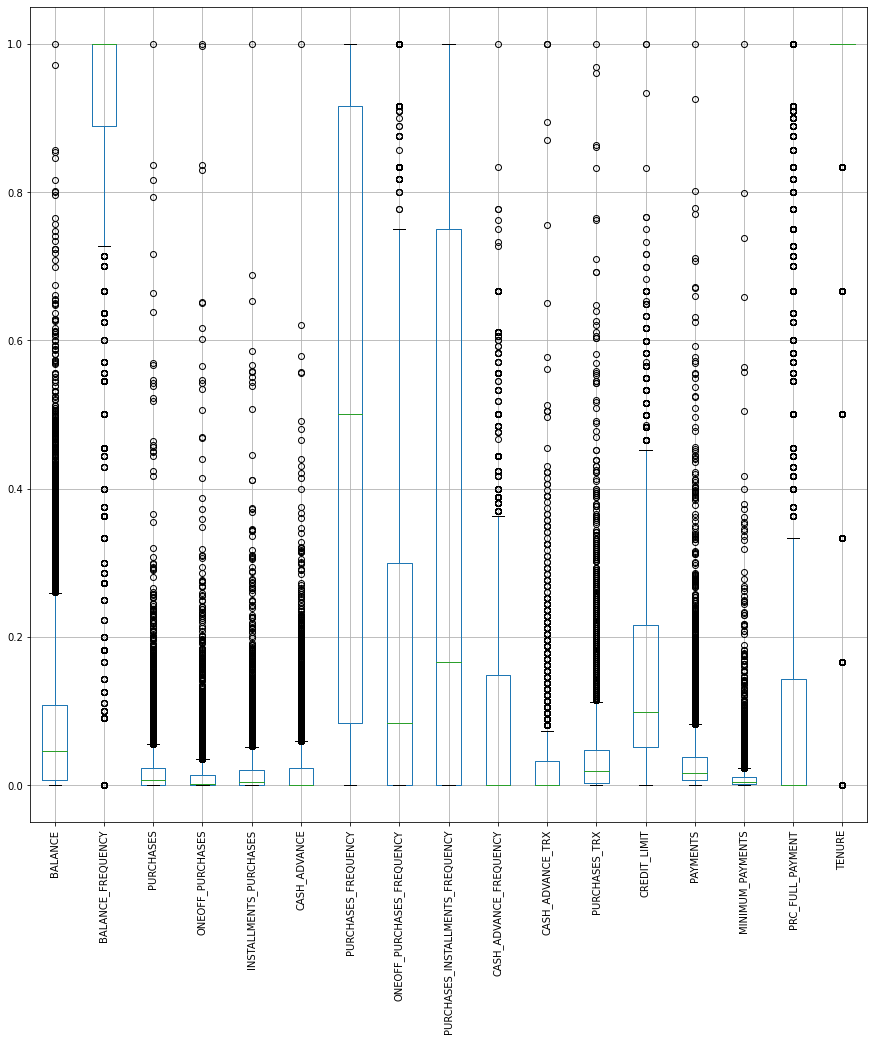

In [ ]:
plt.figure(figsize=(15,15))
df_scaled.boxplot(rot = 90)

## The data needs to be normalized , there is a lot of outliers

### Diminionality reduction

In [ ]:
pca = PCA(n_components=1)
df_red = pd.DataFrame(pca.fit_transform(df_scaled))
print(pca.explained_variance_,', Sum =', sum(pca.explained_variance_).round(2))

pca2 = PCA(n_components=2)
df_red2 = pd.DataFrame(pca2.fit_transform(df_scaled))
print(pca2.explained_variance_,', Sum =', sum(pca2.explained_variance_).round(2))

[0.32892448] , Sum = 0.33
[0.32892448 0.09321128] , Sum = 0.42


In [ ]:
df_red.head(2)

,0
0,-0.482269
1,-0.608709


In [ ]:
df_red2.head(2)

,0,1
0,-0.482269,-0.097884
1,-0.608709,-0.019553


## Modelling

#### Knowing number of clusters

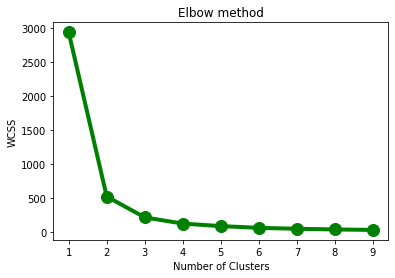

In [ ]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(df_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia , linewidth=4, markersize=12,marker='o',color = 'green')
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
S=[]

K=tqdm(range(2,6))

for k in K:
    # Set the model and its parameters
    model = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labels = model.fit_predict(df_red)
    # Calculate Silhoutte Score and append to a list
    S.append(silhouette_score(df_red, labels, metric='euclidean'))

  0%|          | 0/4 [00:00<?, ?it/s]

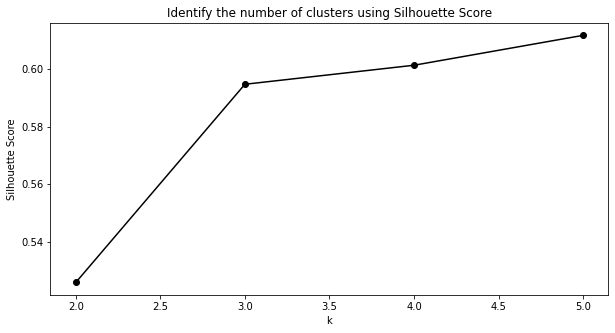

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(K), S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

#### Start clustering using 1 diminsion PCA

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(df_red)
y_pred_kmeans = kmeans.predict(df_red)
print('The score is :' + str(silhouette_score(df_red, kmeans.labels_)))

The score is :0.652211340640334


In [ ]:
GMM = GaussianMixture(n_components=4,random_state=42).fit(df_red)
y_pred = GMM.predict(df_red)
print('The score is :' + str(silhouette_score(df_red, y_pred)))

The score is :0.6012015727947962


In [ ]:
df["tar"]=pd.DataFrame(y_pred)

In [ ]:
fig = px.scatter(df_red, x = 0, y = 0, color=y_pred)
fig.show()

In [ ]:
fig = px.scatter(df_red, x = 0, y = 0, color=y_pred_kmeans)
fig.show()

#### Start clustering using 2 diminsions PCA

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(df_red2)
y_pred_kmeans = kmeans.predict(df_red2)
print('The score is :' + str(silhouette_score(df_red2, kmeans.labels_)))

The score is :0.5287192978677419


In [ ]:
GMM = GaussianMixture(n_components=4,random_state=42).fit(df_red2)
y_pred = GMM.predict(df_red2)
print('The score is :' + str(silhouette_score(df_red2, y_pred)))

The score is :0.46191180161356593


In [ ]:
fig = px.scatter(df_red2, x = 0, y = 1,color=y_pred)
fig.show()

In [ ]:
fig = px.scatter(df_red2, x = 0, y = 1,color=y_pred_kmeans)
fig.show()